<a href="https://colab.research.google.com/github/LeRoiestmortViveleRoi/user-churn/blob/main/%D0%9E%D1%82%D1%82%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostClassifier
from catboost import cv

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Загрузка данных

In [ ]:
df = pd.read_csv('/content/sample_data/Train.csv')
df_test = pd.read_csv('/content/sample_data/Test.csv')

# EDA

In [ ]:
df

,comments_count,replies_count,both_count,sentence_count,word_count,basic_emotions,basic emotions_fear,basic_emotions_anger,basic_emotions_sadness,basic_emotions_joy,...,emotions_of_social_evaluation_guilt,emotions_of_social_evaluation_embarrassment,emotions_of_social_evaluation_pride,emotions_of_social_evaluation_envy,state,state_excited,state_rest,state_estimate,state_process_execution,target
0,152,223,375,514,6682,114,5,9,25,14,...,2,2,5,0,51,12,39,0,0,2
1,306,129,435,488,4550,75,3,1,19,27,...,0,1,1,1,41,4,34,0,3,2
2,89,13,102,180,1373,27,0,0,1,17,...,0,0,0,0,20,0,19,0,1,1
3,193,87,280,336,2509,38,1,2,2,15,...,3,0,0,0,17,6,10,0,1,1
4,509,26,535,969,7076,229,1,5,5,182,...,0,0,1,1,90,5,59,15,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376,830,77,907,1578,11310,378,6,3,8,322,...,0,0,0,0,202,4,189,0,9,1
3377,30,0,30,36,334,9,0,2,0,3,...,0,0,0,0,3,0,1,0,2,1
3378,69,10,79,131,1209,18,0,3,4,2,...,1,0,0,0,2,0,2,0,0,2
3379,252,180,432,567,5922,101,12,7,18,25,...,0,0,0,0,41,11,28,0,2,2


In [ ]:
df.isna().mean()

comments_count                                 0.0
replies_count                                  0.0
both_count                                     0.0
sentence_count                                 0.0
word_count                                     0.0
basic_emotions                                 0.0
basic emotions_fear                            0.0
basic_emotions_anger                           0.0
basic_emotions_sadness                         0.0
basic_emotions_joy                             0.0
basic_emotions_surprise_interest               0.0
basic_emotions_disgust                         0.0
emotions_of_social_evaluation                  0.0
emotions_of_social_evaluation_contempt         0.0
emotions_of_social_evaluation_shame            0.0
emotions_of_social_evaluation_guilt            0.0
emotions_of_social_evaluation_embarrassment    0.0
emotions_of_social_evaluation_pride            0.0
emotions_of_social_evaluation_envy             0.0
state                          

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['comments_count', 'replies_count', 'both_count', 'sentence_count',
       'word_count', 'basic_emotions', 'basic emotions_fear',
       'basic_emotions_anger', 'basic_emotions_sadness', 'basic_emotions_joy',
       'basic_emotions_surprise_interest', 'basic_emotions_disgust',
       'emotions_of_social_evaluation',
       'emotions_of_social_evaluation_contempt',
       'emotions_of_social_evaluation_shame',
       'emotions_of_social_evaluation_guilt',
       'emotions_of_social_evaluation_embarrassment',
       'emotions_of_social_evaluation_pride',
       'emotions_of_social_evaluation_envy', 'state', 'state_excited',
       'state_rest', 'state_estimate', 'state_process_execution', 'target'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df = df.rename(columns={'basic emotions_fear': 'basic_emotions_fear'})

In [ ]:
df_test = df_test.rename(columns={'basic emotions_fear': 'basic_emotions_fear'})

In [ ]:
• replies_count – общее количество ответов на комментарии под видео,

• both_count – общее количество сообщений под видео,

• sentence_count – общее количество предложений под видео,

• word_count – общее количество слов под видео,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   comments_count                               3381 non-null   int64
 1   replies_count                                3381 non-null   int64
 2   both_count                                   3381 non-null   int64
 3   sentence_count                               3381 non-null   int64
 4   word_count                                   3381 non-null   int64
 5   basic_emotions                               3381 non-null   int64
 6   basic_emotions_fear                          3381 non-null   int64
 7   basic_emotions_anger                         3381 non-null   int64
 8   basic_emotions_sadness                       3381 non-null   int64
 9   basic_emotions_joy                           3381 non-null   int64
 10  basic_emotions_surprise_

In [ ]:
df['emotions_of_social_evaluation_contempt']

0       1
1       0
2       0
3       0
4       0
       ..
3376    0
3377    0
3378    2
3379    1
3380    4
Name: emotions_of_social_evaluation_contempt, Length: 3381, dtype: int64

In [ ]:
df.select_dtypes(include='object').columns

Index(['TotalSpent', 'Sex', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'],
      dtype='object')

In [ ]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 696 kB 4.7 MB/s 


In [ ]:
df.Sex.value_counts()

Male      2655
Female    2627
Name: Sex, dtype: int64

In [ ]:
#list(map(float, df['TotalSpent'])) #выдает ошибку, надо посмотреть на пропуски

In [ ]:
df['TotalSpent'].isna().value_counts()

False    5282
Name: TotalSpent, dtype: int64

In [ ]:
df['TotalSpent'].sort_values(ascending=True).head(15)

4598          
2543          
4551          
1707          
3078          
4326          
1048          
3697          
4002          
3343     100.2
693     100.25
898     100.35
1595     100.4
1781     100.9
1129    1001.5
Name: TotalSpent, dtype: object

In [ ]:
df.iloc[['4598', '2543', '4551', '1707',
   '3078', '4326', '1048',  '3697',  '4002']]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0


In [ ]:
pd.Series(map(float, df.TotalSpent.drop([4598, 2543, 4551, 1707,
   3078, 4326, 1048, 3697, 4002], axis=0))).mean()

2291.3904608382327

In [ ]:
df.replace(' ', 2291.3904608382327, inplace=True)
df.TotalSpent = pd.Series(map(float, df['TotalSpent']))

In [ ]:
df_test.replace(' ', 2291.3904608382327, inplace=True)
df_test.TotalSpent = pd.Series(map(float, df_test['TotalSpent']))

In [ ]:
df.TotalSpent.dtype #теперь все нормально с типом

dtype('float64')

In [ ]:
df.TotalSpent.mean()

2291.3904608382327

In [ ]:
df

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [ ]:
df.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
df['HasPartner'] = df['HasPartner'].replace('Yes', 1)
df['HasPartner'] = df['HasPartner'].replace('No', 0)

In [ ]:
df_test['HasPartner'] = df_test['HasPartner'].replace('Yes', 1)
df_test['HasPartner'] = df_test['HasPartner'].replace('No', 0)

In [ ]:
df['HasChild'] = df['HasChild'].replace('Yes', 1)
df['HasChild'] = df['HasChild'].replace('No', 0)

In [ ]:
df_test['HasChild'] = df_test['HasChild'].replace('Yes', 1)
df_test['HasChild'] = df_test['HasChild'].replace('No', 0)

In [ ]:
df['HasChild2'] = df[['Sex', 'HasChild', 'IsSeniorCitizen', 'HasPartner']].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df_test['HasChild2'] = df_test[['Sex', 'HasChild', 'IsSeniorCitizen', 'HasPartner']].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
interval_cols = ['comments_count', 'replies_count', 'both_count', 'sentence_count', 'word_count', 'basic_emotions', 'basic_emotions_fear', 'basic_emotions_anger', 'basic_emotions_sadness', 'basic_emotions_joy', 'basic_emotions_surprise_interest', 'basic_emotions_disgust', 'emotions_of_social_evaluation', 'emotions_of_social_evaluation_contempt', 'emotions_of_social_evaluation_shame', 'emotions_of_social_evaluation_guilt', 'emotions_of_social_evaluation_embarrassment', 'emotions_of_social_evaluation_pride', 'emotions_of_social_evaluation_envy', 'state', 'state_excited', 'state_rest', 'state_estimate', 'state_process_execution', 'target']
phik_overview = df.phik_matrix(interval_cols=interval_cols)

In [ ]:
phik_overview

,comments_count,replies_count,both_count,sentence_count,word_count,basic_emotions,basic_emotions_fear,basic_emotions_anger,basic_emotions_sadness,basic_emotions_joy,basic_emotions_surprise_interest,basic_emotions_disgust,emotions_of_social_evaluation,emotions_of_social_evaluation_contempt,emotions_of_social_evaluation_shame,emotions_of_social_evaluation_guilt,emotions_of_social_evaluation_embarrassment,emotions_of_social_evaluation_pride,emotions_of_social_evaluation_envy,state,state_excited,state_rest,state_estimate,state_process_execution,target
comments_count,1.000000,0.864395,0.993569,0.993767,0.959081,0.874674,0.972347,0.894803,0.885323,0.856068,0.855742,0.858908,0.853892,0.796802,0.777911,0.816934,0.952576,0.843247,0.802120,0.989702,0.874218,0.989430,0.807706,0.855821,0.389404
replies_count,0.864395,1.000000,0.893579,0.908246,0.956249,0.851099,0.901548,0.865739,0.905903,0.950707,0.947930,0.950499,0.949515,0.849582,0.826187,0.804648,0.882434,0.829624,0.938118,0.885752,0.960839,0.877761,0.785982,0.944769,0.480000
both_count,0.993569,0.893579,1.000000,0.991442,0.944663,0.859393,0.980647,0.912710,0.877457,0.837870,0.854176,0.883919,0.880944,0.825566,0.810496,0.798163,0.964845,0.817591,0.794991,0.987275,0.860307,0.985443,0.814240,0.843667,0.362186
sentence_count,0.993767,0.908246,0.991442,1.000000,0.944599,0.904293,0.985614,0.888564,0.897012,0.842363,0.829328,0.851847,0.886145,0.836441,0.835898,0.805199,0.966553,0.823621,0.775849,0.990016,0.875448,0.989821,0.827221,0.848587,0.378884
word_count,0.959081,0.956249,0.944663,0.944599,1.000000,0.890535,0.872696,0.915378,0.865700,0.962403,0.963373,0.971983,0.920984,0.773568,0.799669,0.814599,0.842797,0.849699,0.917703,0.939147,0.974962,0.933359,0.862816,0.969448,0.553170
basic_emotions,0.874674,0.851099,0.859393,0.904293,0.890535,1.000000,0.820976,0.870043,0.975761,0.884543,0.869011,0.888897,0.889195,0.762831,0.777035,0.756926,0.827361,0.813566,0.763510,0.883633,0.892903,0.864892,0.840653,0.877921,0.328342
basic_emotions_fear,0.972347,0.901548,0.980647,0.985614,0.872696,0.820976,1.000000,0.868726,0.844658,0.783095,0.767763,0.794709,0.864840,0.850729,0.828159,0.801943,0.947711,0.796320,0.734591,0.971535,0.821255,0.972751,0.742212,0.755481,0.362117
basic_emotions_anger,0.894803,0.865739,0.912710,0.888564,0.915378,0.870043,0.868726,1.000000,0.861570,0.847293,0.824619,0.919898,0.920353,0.925782,0.931833,0.935133,0.839726,0.945965,0.849052,0.917671,0.875073,0.909784,0.920901,0.867355,0.376138
basic_emotions_sadness,0.885323,0.905903,0.877457,0.897012,0.865700,0.975761,0.844658,0.861570,1.000000,0.873676,0.818688,0.861804,0.907929,0.762434,0.774663,0.820026,0.843821,0.816557,0.732097,0.911560,0.870912,0.905301,0.829249,0.866406,0.311889
basic_emotions_joy,0.856068,0.950707,0.837870,0.842363,0.962403,0.884543,0.783095,0.847293,0.873676,1.000000,0.950817,0.953892,0.879069,0.704448,0.755397,0.753746,0.789578,0.841524,0.890292,0.841670,0.965063,0.834208,0.839640,0.968268,0.506906


In [ ]:
import seaborn as sns
import matplotlib as plt

TypeError: ignored

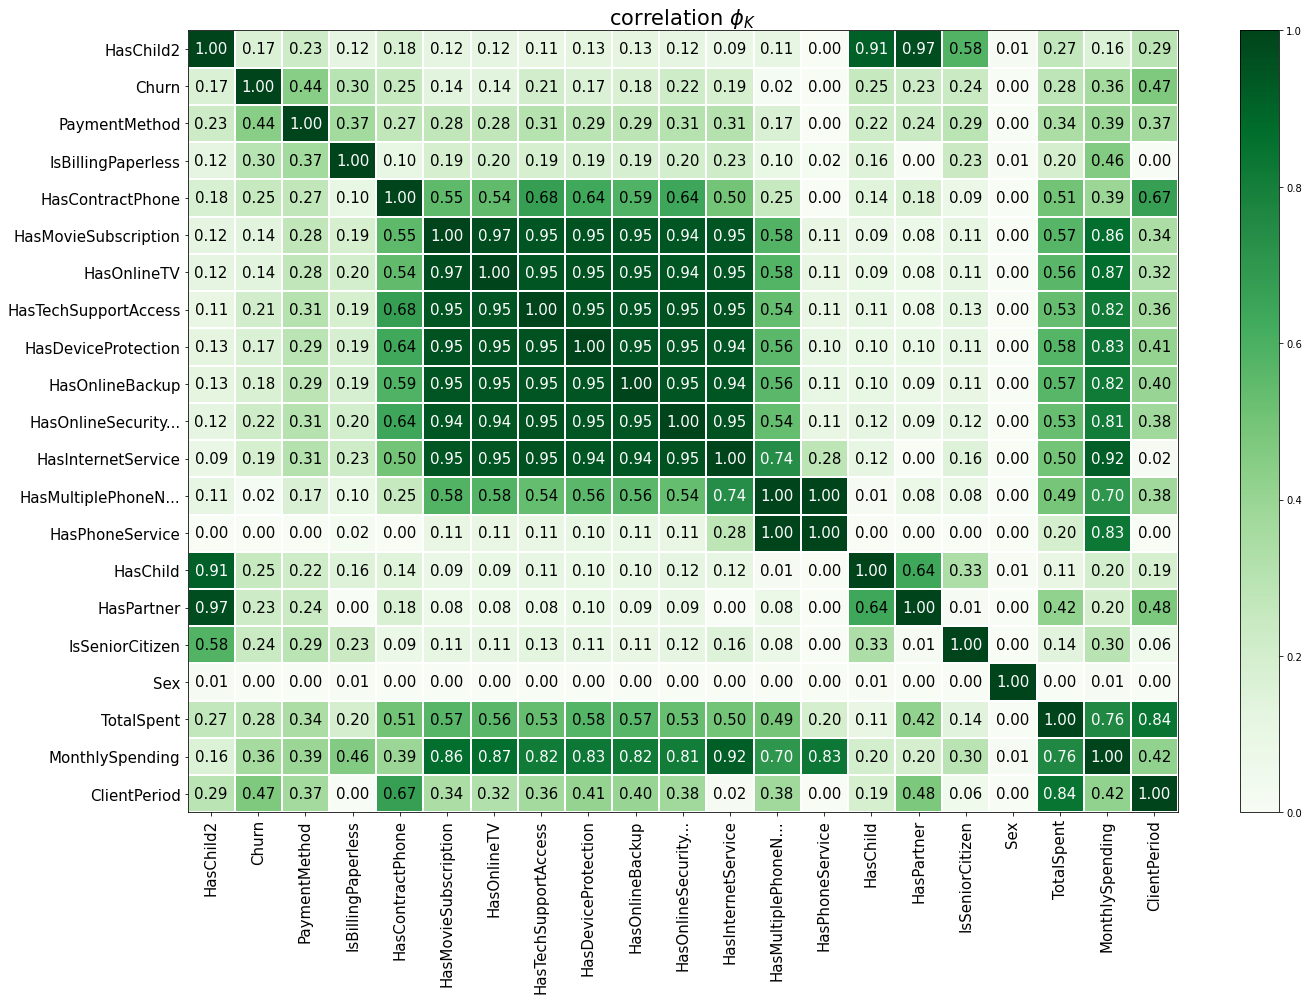

In [ ]:
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(20, 14))
plt.tight_layout()

In [ ]:
df.corr()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,Churn,HasChild2
ClientPeriod,1.000000,0.249414,0.825103,0.011561,0.370314,0.146120,-0.350640,0.299857
MonthlySpending,0.249414,1.000000,0.651510,0.215456,0.087652,-0.125682,0.184769,0.075818
TotalSpent,0.825103,0.651510,1.000000,0.093972,0.310383,0.049888,-0.201233,0.248363
IsSeniorCitizen,0.011561,0.215456,0.093972,1.000000,0.016764,-0.217007,0.156872,0.320968
HasPartner,0.370314,0.087652,0.310383,0.016764,1.000000,0.442530,-0.148347,0.829329
HasChild,0.146120,-0.125682,0.049888,-0.217007,0.442530,1.000000,-0.163609,0.703346
Churn,-0.350640,0.184769,-0.201233,0.156872,-0.148347,-0.163609,1.000000,-0.107517
HasChild2,0.299857,0.075818,0.248363,0.320968,0.829329,0.703346,-0.107517,1.000000


In [ ]:
df2

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,0,1,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
5278,50,44.45,2188.45,0,0,0,1,0,1,1,...,0,0,1,0,0,1,1,0,0,0
5279,1,55.05,55.05,0,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
5280,29,76.00,2215.25,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
df2 = df.copy()

In [ ]:
cat_features = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
df2 = pd.concat((df.drop(columns=cat_features, axis=1), pd.get_dummies(df2[cat_features])), axis=1)

In [ ]:
df2

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn,HasChild2,HasPartner,HasChild,Sex_Female,Sex_Male,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,2,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,0,2,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,0,2,1,1,1,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
5278,50,44.45,2188.45,0,0,1,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
5279,1,55.05,55.05,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
5280,29,76.00,2215.25,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
train, test = train_test_split(df2,train_size=0.8,random_state=42)

In [ ]:
X =
y = ['Churn']

# LogReg

In [ ]:
params = {
    "model__C": [1.734],  # np.arange(0.001, 100, 0.001)
}
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(penalty="l1", solver="saga", max_iter=1000, random_state=42)),
])
cv_log = GridSearchCV(
    estimator=clf,
    param_grid=params,
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
    refit=True
)
cv_log.fit(train[X], train[y])

In [ ]:
print(f"best score: {cv_log.best_score_}")
print(f"best params: {cv_log.best_params_}")

best score: 0.7967903894469811
best params: {'C': 1.0, 'penalty': 'l2'}


# RandomForest

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
params = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=params,
    scoring="roc_auc",
    cv= 5)
cv_rfc.fit(train[X], train[y])

In [ ]:
print(f"best score: {cv_rfc.best_score_}")
print(f"best params: {cv_rfc.best_params_}")

best score: 0.849605851074215
best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}


# Catboost

In [ ]:
train, test = train_test_split(df,train_size=0.8,random_state=42)

In [ ]:
df.columns

Index(['comments_count', 'replies_count', 'both_count', 'sentence_count',
       'word_count', 'basic_emotions', 'basic_emotions_fear',
       'basic_emotions_anger', 'basic_emotions_sadness', 'basic_emotions_joy',
       'basic_emotions_surprise_interest', 'basic_emotions_disgust',
       'emotions_of_social_evaluation',
       'emotions_of_social_evaluation_contempt',
       'emotions_of_social_evaluation_shame',
       'emotions_of_social_evaluation_guilt',
       'emotions_of_social_evaluation_embarrassment',
       'emotions_of_social_evaluation_pride',
       'emotions_of_social_evaluation_envy', 'state', 'state_excited',
       'state_rest', 'state_estimate', 'state_process_execution', 'target'],
      dtype='object')

In [ ]:
y = ['target']
cat_features = ['HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'HasChild2']
X = ['comments_count', 'replies_count', 'both_count', 'sentence_count',
       'word_count', 'basic_emotions', 'basic_emotions_fear',
       'basic_emotions_anger', 'basic_emotions_sadness', 'basic_emotions_joy',
       'basic_emotions_surprise_interest', 'basic_emotions_disgust',
       'emotions_of_social_evaluation',
       'emotions_of_social_evaluation_contempt',
       'emotions_of_social_evaluation_shame',
       'emotions_of_social_evaluation_guilt',
       'emotions_of_social_evaluation_embarrassment',
       'emotions_of_social_evaluation_pride',
       'emotions_of_social_evaluation_envy', 'state', 'state_excited',
       'state_rest', 'state_estimate', 'state_process_execution']

In [ ]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y]
                 )
full_data = Pool(data=df[X],
                  label=df[y]
                 )

In [ ]:
df.target.value_counts()

TypeError: ignored

In [ ]:
params = { 'od_wait': 1477, 'learning_rate': 0.4389713640353104, 'reg_lambda': 6.430842140829364,  'random_strength': 46.147773009723785, 'depth': 3, 'min_data_in_leaf': 30, 'leaf_estimation_iterations': 1}

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_data)

0:	learn: 0.9296567	total: 2.69ms	remaining: 2.69s
1:	learn: 0.8511183	total: 5.4ms	remaining: 2.7s
2:	learn: 0.8164587	total: 7.79ms	remaining: 2.59s
3:	learn: 0.7878114	total: 10.2ms	remaining: 2.54s
4:	learn: 0.7774371	total: 12.6ms	remaining: 2.5s
5:	learn: 0.7538053	total: 14.9ms	remaining: 2.47s
6:	learn: 0.7383639	total: 17.3ms	remaining: 2.45s
7:	learn: 0.7369040	total: 19.6ms	remaining: 2.44s
8:	learn: 0.7279960	total: 21.9ms	remaining: 2.42s
9:	learn: 0.7190652	total: 24.4ms	remaining: 2.41s
10:	learn: 0.7187385	total: 26.7ms	remaining: 2.4s
11:	learn: 0.7086999	total: 29.1ms	remaining: 2.4s
12:	learn: 0.7027706	total: 31.8ms	remaining: 2.41s
13:	learn: 0.7017290	total: 34.2ms	remaining: 2.41s
14:	learn: 0.6852627	total: 36.6ms	remaining: 2.4s
15:	learn: 0.6836623	total: 39ms	remaining: 2.4s
16:	learn: 0.6545905	total: 41.5ms	remaining: 2.4s
17:	learn: 0.6430928	total: 43.8ms	remaining: 2.39s
18:	learn: 0.6422546	total: 47.4ms	remaining: 2.45s
19:	learn: 0.6413164	total: 49.7

In [ ]:
test['score'] = model.predict(test[X])

In [ ]:
test['score'].value_counts()

2    334
1    320
0     23
Name: score, dtype: int64

In [ ]:
model.predict_proba(test[X])

array([[3.82720914e-03, 1.22539304e-04, 9.96050252e-01],
       [1.22213813e-03, 9.98634088e-01, 1.43773603e-04],
       [1.05573161e-02, 1.58553662e-02, 9.73587318e-01],
       ...,
       [2.28594454e-05, 9.99973161e-01, 3.97998055e-06],
       [2.28227173e-01, 2.44006714e-01, 5.27766114e-01],
       [1.36668293e-01, 3.05120817e-03, 8.60280498e-01]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(test['target'], test['score'], average='weighted')

0.8599152994515606

In [ ]:
roc_auc_score(test['target'], test['score'])

ValueError: ignored

In [ ]:
model.fit(full_data)

0:	learn: 0.9320106	total: 2.69ms	remaining: 2.69s
1:	learn: 0.8532143	total: 5.71ms	remaining: 2.85s
2:	learn: 0.8183900	total: 8.78ms	remaining: 2.92s
3:	learn: 0.7567409	total: 11.4ms	remaining: 2.84s
4:	learn: 0.7460114	total: 14.1ms	remaining: 2.8s
5:	learn: 0.7250049	total: 16.8ms	remaining: 2.78s
6:	learn: 0.7097644	total: 19.5ms	remaining: 2.76s
7:	learn: 0.7074588	total: 22ms	remaining: 2.73s
8:	learn: 0.7059874	total: 24.6ms	remaining: 2.71s
9:	learn: 0.6970588	total: 27.3ms	remaining: 2.7s
10:	learn: 0.6967502	total: 29.8ms	remaining: 2.68s
11:	learn: 0.6926157	total: 32.5ms	remaining: 2.68s
12:	learn: 0.6871815	total: 35.2ms	remaining: 2.67s
13:	learn: 0.6860773	total: 37.9ms	remaining: 2.67s
14:	learn: 0.6685788	total: 40.5ms	remaining: 2.66s
15:	learn: 0.6683868	total: 43ms	remaining: 2.65s
16:	learn: 0.6579838	total: 45.8ms	remaining: 2.65s
17:	learn: 0.6495624	total: 48.3ms	remaining: 2.63s
18:	learn: 0.6488261	total: 50.8ms	remaining: 2.62s
19:	learn: 0.6393062	total: 

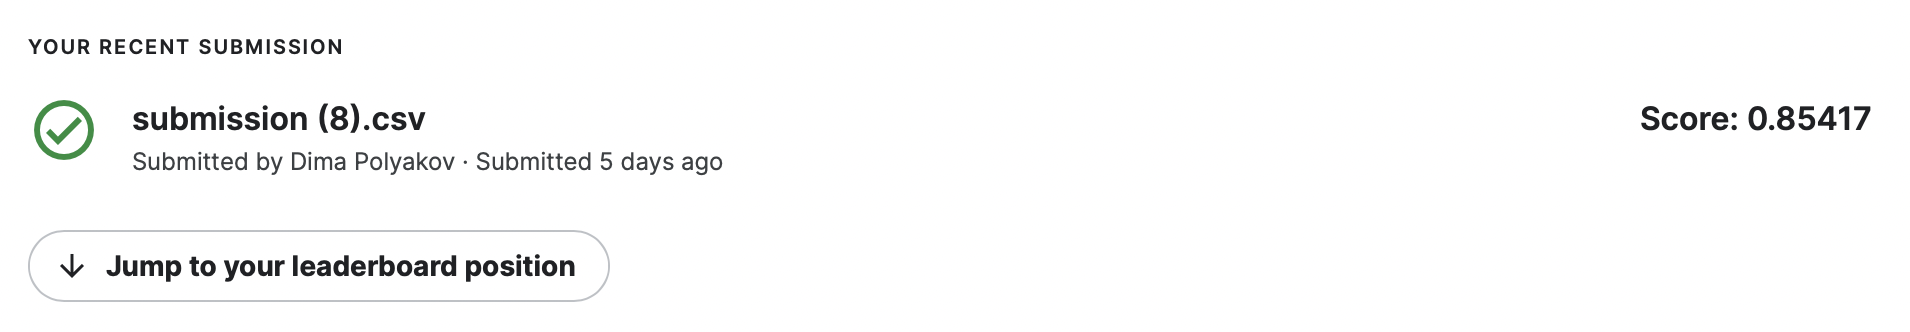

# Optuna

In [ ]:
!pip3 install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 14.1 MB/s 
     |████████████████████████████████| 81 kB 11.7 MB/s 
     |████████████████████████████████| 209 kB 75.2 MB/s 
     |████████████████████████████████| 78 kB 9.1 MB/s 
     |████████████████████████████████| 147 kB 79.8 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 112 kB 78.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=4f35aa15edcc1af0893e6ffde5fe970d55eb70c0d794a7578ef7e3575eaa146c
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [ ]:
from optuna.samplers import TPESampler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

random_state = 42

In [ ]:
def objective(trial):

    global train_data

    params = {
        #'n_estimators': trial.suggest_int("n_estimators", 150, 320),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        'max_depth': trial.suggest_int("max_depth", 2, 6),

        #'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1, 6),
        #'random_strength': trial.suggest_float("random_strength", 0.9, 1.4),
        #'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 1, 5),
        #'grow_policy': trial.suggest_categorical('grow_policy', ['Lossguide']),
        "loss_function": trial.suggest_categorical('loss_function', ['MultiClass']),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', ['Balanced']),
        'logging_level': trial.suggest_categorical('logging_level', ['Silent']),
        }

    scores = cv(train_data, params, fold_count=5)

    return scores

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1e6, timeout=60*5)

fig_list = [
        optuna.visualization.plot_optimization_history(study),
        optuna.visualization.plot_param_importances(study),
    ]
for fig in fig_list:
    fig.update_layout(width=1000)
    fig.show()

In [ ]:
print(f"Количество запусков: {len(study.trials)}")

trial = study.best_trial
print(f"Лучший результат ROC AUC: {trial.value}")

trial = study.best_trial
parameters = trial.params
print('Оптимальные параметры:', parameters)

Количество запусков: 2


ValueError: ignored

In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix,precision_score
import os
import catboost as ctb

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c126aa61b2ce551296fcdaff1df2ae4a335ddf3d16ccd3f935028a5e361d88b7
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
import sklearn

In [ ]:
#label encodeing the Class feature
X,Y=df.drop(['target'],axis=1),df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

In [ ]:
#define parameter range
learning_rate=np.linspace(0.01,0.1,10)
max_depth=np.arange(2, 18, 2)
colsample_bylevel=np.arange(0.3, 0.8, 0.1)
iterations=np.arange(50, 1000, 50)
l2_leaf_reg=np.arange(0,10)
bagging_temperature=np.arange(0,100,10)
#define the categorical features if any in the dataset for catboost to handle
categorical_features_indices = np.where(X_train.dtypes == np.object)[0]

In [ ]:
#Define parameter space, fit conditions
ctb_clf_params = {
    'learning_rate':     hp.choice('learning_rate',    learning_rate),
    'max_depth':         hp.choice('max_depth',         max_depth),
    #'colsample_bylevel': hp.choice('colsample_bylevel', colsample_bylevel),
    'iterations':       hp.choice('iterations',            iterations),
    #'l2_leaf_reg':       hp.choice('l2_leaf_reg',            l2_leaf_reg),
    #'bagging_temperature':       hp.choice('bagging_temperature',            bagging_temperature),
    'loss_function':       'MultiClass',

}
ctb_fit_params = {
    'early_stopping_rounds': 5,
    'verbose': False,
    'cat_features': categorical_features_indices
}
ctb_para = dict()
ctb_para['clf_params'] = ctb_clf_params
ctb_para['fit_params'] = ctb_fit_params

In [ ]:
#define Hyperopt class
class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            print('entering fmin')
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result

    def ctb_reg(self, para):
        reg = ctb.CatBoostClassifier(**para['reg_params'])
        print('ctb initialized')
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        print('fitting model')
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        print('model fitted')
        pred = reg.predict(self.x_test)
        #loss = para['loss_func'](self.y_test, pred)
        f1=sklearn.metrics.f1_score(self.y_test,pred,average='micro')
        f1=f1*(-1)
        print(f1)
        return {'loss': f1, 'status': STATUS_OK}

In [ ]:
#define objective and find the best hyperparameters

obj = HYPOpt(X_train, X_test, y_train, y_test)
ctb_opt = obj.process(fn_name='ctb_clf', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=5)

entering fmin
  0%|          | 0/5 [00:00<?, ?it/s, best loss: ?]


In [ ]:
#Save best parametrs in a dictionary
best_param={}
best_param['learning_rate']=learning_rate[ctb_opt['learning_rate']]
best_param['iterations']=iterations[ctb_opt['iterations']]
best_param['max_depth']=max_depth[ctb_opt['max_depth']]

KeyError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
import lightgbm as lgbm
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
import optuna
import tqdm
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [ ]:
X=df.drop(['target'],axis=1)
Y=df['target']

In [ ]:
def objective(trial,data=X,target=Y):

    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2,random_state=42)
    params = {'iterations':trial.suggest_int("iterations", 4000, 25000),
              'od_wait':trial.suggest_int('od_wait', 500, 2300),
             'loss_function':'MultiClass',
              'task_type':"GPU",
              'eval_metric':'MultiClass',
              'leaf_estimation_method':'Newton',
              'bootstrap_type': 'Bernoulli',
              'learning_rate' : trial.suggest_uniform('learning_rate',0.02,1),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'random_strength': trial.suggest_uniform('random_strength',10,50),
              'depth': trial.suggest_int('depth',1,15),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
               }
    model = CatBoostClassifier(**params)
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)

    y_preds = model.predict_proba(X_test)


    F1 = f1_score(y_test, y_preds)

    return F1

In [ ]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2022-12-02 21:54:47,092] A new study created in memory with name: no-name-7bcf022f-3238-4db2-9074-9993d8954f30
[W 2022-12-02 21:58:39,802] Trial 0 failed because of the following error: ValueError("Classification metrics can't handle a mix of multiclass and continuous-multioutput targets")
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-49-c2d6d25fbdc1>", line 25, in objective
    F1 = f1_score(y_test, y_preds)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _chec

ValueError: ignored

In [ ]:
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))
    display(optuna.visualization.plot_parallel_coordinate(study))

NameError: ignored

# Submission

In [ ]:
df_test['target'] = model.predict(df_test[X])

In [ ]:
submission = pd.read_csv('/content/SampleSubmission.csv')

In [ ]:
submission

,target
0,0
1,0
2,0
3,0
4,0
...,...
1444,0
1445,0
1446,0
1447,0


In [ ]:

submission['target'] = df_test.target
submission.to_csv('/content/sample_data/submission.csv', index = False)

In [ ]:
submission

,target
0,2
1,2
2,1
3,1
4,2
...,...
1444,1
1445,2
1446,2
1447,1
